# First Order System 
## Step Response

Response for a first order system axposed to a step force (Heaviside function). 
The system starts art rest with the initial value $s_0$ for $t=0$, and goes towards a the final value $s_\infty$ when $t \rightarrow \infty$. 
The time constant for the system is $\tau$
The response as function of time is 

$s(t) = s_\infty - (s_\infty - s_0)e^{-t/\tau}$

In [3]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

# Allow interactive figures in Matplotlig
%matplotlib ipympl    

class StepResponse:
    """Demonstation of first order system step response.

    All calculations and plotting routines are contained in this class
    """
    def __init__(self, s_0=0, s_inf=1, tau=1):
        """Initialise system parameters."""
        self.s_0 = s_0        # Initial value
        self.s_inf = s_inf    # Final value
        self.tau = tau        # Time constant
        self.t_min = -2       # Minimum time on plot
        self.t_max = 20       # Maximum time on plot
        self.n_t = 300        # Number of points in time vectors
        self.ax = self.initialise_graphs()

    def initialise_graphs(self):
        """Initialise result graph ."""
        plt.close("all")
        plt.rc('font', size=10)          # Default text sizes
        fig = plt.figure(figsize=[10, 5],
                         constrained_layout=True,
                         num="First Order System - Step Response")
        ax = fig.add_subplot(1, 1, 1)

        ax.set(xlim=(self.t_min, self.t_max),
               xlabel="Time [s]",
               ylabel="Response s(t)")

        return ax

    def t(self):
        """Create time vector."""
        return np.linspace(self.t_min, self.t_max, self.n_t)

    def _calc_response(self, t):
        """Calculate step response."""
        if self.tau == 0:
            # Exception if time constant equals zero
            s = self.s_inf * np.ones_like(t)
        else:
            s = self.s_inf - (self.s_inf - self.s_0) * np.exp(-t/self.tau)

        k_neg = np.argwhere(t<0)
        s[k_neg] = self.s_0 * np.ones_like(k_neg)   # Set initial value for t<0

        return s

    def s(self):
        """Find step response for all time-points."""
        s = self._calc_response(self.t())
        return s

    def plot(self):
        """Plot result in graph."""
        for art in list(self.ax.lines):
            art.remove()

        # Response at integer no. of time constants
        t_tau = self.tau * np.arange(1, 10)
        s_tau = self._calc_response(t_tau)
        
        self.ax.plot(self.t(), self.s(), "-", color="C0")
        self.ax.plot(t_tau, s_tau, "o", color="C0")
        self.ax.axhline(y=self.s_0, color="black", linestyle='-')
        self.ax.axhline(y=self.s_inf, color="black", linestyle='-')
        self.ax.grid(True)

        ds = abs(self.s_inf - self.s_0)
        s_min = min(self.s_inf, self.s_0) - 0.1*ds
        s_max = max(self.s_inf, self.s_0) + 0.1*ds
        self.ax.set_ylim(s_min, s_max)

        return 0

Label(value='First Order System Step Response', style=LabelStyle(font_weight='bold'))

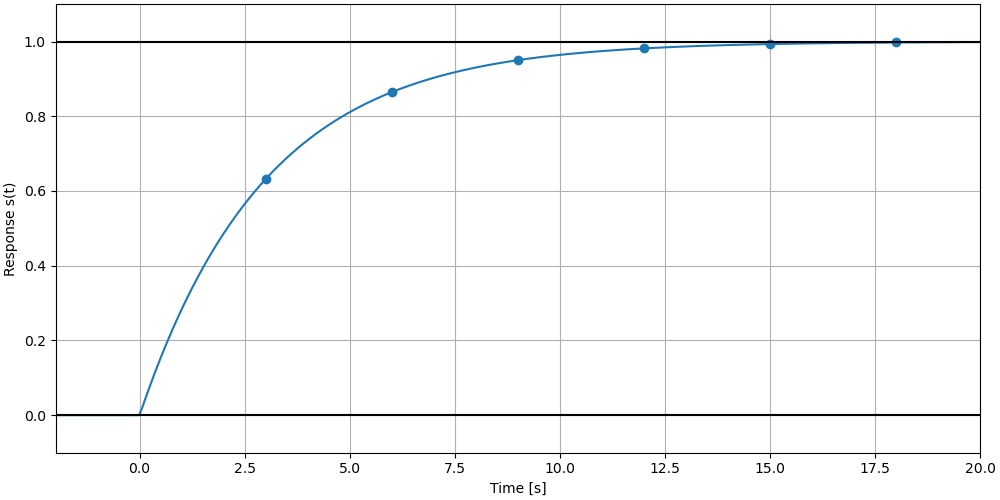

In [7]:
# Load modules for intereactive operation
import ipywidgets as widgets

#  Function that runs the demo interactively
def run_stepresponse(s_0, s_inf, tau):
    """Set values and call plotting function."""
    step_resp.s_0 = s_0
    step_resp.s_inf = s_inf
    step_resp.tau = tau
    step_resp.plot()
    
    return

# Define widgets to operate program
widget_style = dict(description_width='initial')

title_widget = widgets.Label("First Order System Step Response", 
                             style=dict(font_weight='bold'))

s_0_widget = widgets.FloatText(min=-10, max= 10, value=0, step=0.5, 
                                 description='Initial value ',  
                                 readout_format='.1f',
                                 layout=widgets.Layout(width='60%'), 
                                 style=widget_style)

s_inf_widget = widgets.FloatText(min=-10, max= 10, value=1, step=0.5, 
                                 description='Final value ',  
                                 readout_format='.1f',
                                 layout=widgets.Layout(width='60%'), 
                                 style=widget_style)

tau_widget = widgets.FloatSlider(min=00, max= 10, value=3, step=0.1, 
                                 description='Time constant [s]',  
                                 readout_format='.1f',
                                 layout=widgets.Layout(width='40%'),
                                 style=widget_style)

widget_line = widgets.VBox([s_0_widget, s_inf_widget])
widget_box = widgets.HBox([widget_line, tau_widget])

display(title_widget)
display(widget_box)

# Define signal and run demo
step_resp = StepResponse()
w = widgets.interactive(run_stepresponse, s_0=s_0_widget, s_inf=s_inf_widget, tau=tau_widget)